# Bias Variance Trade-off When Determing The Proton RMS-radius from Electron Scattering Data 

* <b>On the determination of the proton RMS-radius from electron scattering data</b><br>
F. Borkowski,  G.G. Simon, V. H. Walther, R.D. Wendling<br>
Zeitschrift für Physik A Atoms and Nuclei, 275 (1975) 29-31.<br>
https://doi.org/10.1007/BF01409496<br><br>
<b>Abstract:</b>  "It is shown that the proton rms radius should be determined from fitting a polynomial of second order to the low-q2 form factors. The commonly used polynomial of first order yields radius values which are too small. The proton rms radius has been redetermined from an analysis of the electron scattering data measured at three laboratories. The best fit value is 0.87±0.02 fm."<br>
<b>Comment:</b> What the authors should have said is the low q2 linear fits have a large bias and a low varaiance while the quadratic fits have a low bias and a high variance.  Also it should be stated clearly this test assumes standard dipole, which its 0.81fm radius, is correct yet this very paper extracts a radius of 0.87fm!?

<b>REAL CONCLUSION</b> A linear fit with 15 data points equal spaced from 0.1 to 0.8 fm^{-2} produces nearly the same root mean square error as a quadratic fit with 31 data points equal space from 0.1 to 1.6 fm^{-2}.   When one takes into account that in order to extract G_E from the higher q2 fits also requires determining the magnetic form factor, lower q2 fits are clearly preferable for a parsimonious extraction of the proton radius in complete contradition to the conclusions of the original paper.

The second problem with this papers conclusion is it implies that going to higher Q2 is better while not only using more events in the higher Q2 fits, but ignoring the fact the cross sections are smaller at high Q2.   

(note: next step will be to add table with equal events)

## Introduction

This code shows that while it is true that the first order polynomials have bias, 
if one considers the total error = bias**2 + variance, one will find exactly the
opposite conclusion to that drawn by this classic 1975 paper which seems to be the
source of the very complex modelings and inappropriate remarks requarding parsimonious 
models.

## The Exact Example From The Z. Physics Paper

In [3]:
# Influence was studied by fitting pseudo data to the dipole formula

import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters

#
# Parmeters
#

minq2=[0.1,0.1,0.1,0.1] # list of minimum q2 values
maxq2=[0.4,0.8,1.2,1.6] # list of maximum q2 values
spacing=0.05            # spacing between point in fm**(-2)
error=0.005             # random error to be adding to each point
loops=1000000            # number of simulations for each (minq2,maxq2) range

#
# Input Dipole Charge Form Factor
#
    
def dipole(q2):
      return (1+q2/18.23)**(-2)
true=-0.1097 # input radius

#
# Linear and Quadratic Fit Functions
#

def linear(q2,a0,a1):
    return a0+a1*q2

def quad(q2,a0,a1,a2):
    return a0+a1*q2+a2*q2**2

#
# Lists and Dictionaries For Storing Simulation Results
#

lone=[]; ltwo=[]; lthree=[]; lfour=[]; qone=[]; qtwo=[]; qthree=[]; qfour=[]
linear_example_result=[]; quad_example_result=[]

rlinear={'0':lone, '1':ltwo, '2':lthree, '3':lfour}
rquad={'0':qone, '1':qtwo, '2':qthree, '3':qfour}

#
# Monte Carlo Loop With LMFIT Of Linear and Quadratic Functions
#

for n in range(len(maxq2)):
    q2list=np.linspace(minq2[n],maxq2[n],int(np.around((maxq2[n]-minq2[n])/spacing)+1))
    print('Generating faux data at q2 points:\n ',q2list)
    for m in range(loops):
        data=dipole(q2list)+(error*np.random.randn(len(q2list)))
        model=Model(quad)
        result_quad=model.fit(data,q2=q2list,a0=1,a1=-0.11,a2=0.01,weights=1/error)
        model=Model(linear)
        result_linear=model.fit(data,q2=q2list,a0=1,a1=-0.11,weights=1/error)
        rlinear[str(n)].append([result_linear.best_values['a0'],result_linear.best_values['a1']])
        rquad[str(n)].append([result_quad.best_values['a0'],result_quad.best_values['a1'],result_quad.best_values['a2']])
        if (m+1)%200==0:
            print('.',end="")
        if (m+1)%10000==0:
            print(m+1)
    # saving one full fit object for each range
    linear_example_result.append(result_linear) 
    quad_example_result.append(result_quad) 

Generating faux data at q2 points:
  [ 0.1   0.15  0.2   0.25  0.3   0.35  0.4 ]
..................................................10000
..................................................20000
..................................................30000
..................................................40000
..................................................50000
..................................................60000
..................................................70000
..................................................80000
..................................................90000
..................................................100000
..................................................110000
..................................................120000
..................................................130000
..................................................140000
..................................................150000
..................................................160000
................

..................................................810000
..................................................820000
..................................................830000
..................................................840000
..................................................850000
..................................................860000
..................................................870000
..................................................880000
..................................................890000
..................................................900000
..................................................910000
..................................................920000
..................................................930000
..................................................940000
..................................................950000
..................................................960000
..................................................970000
...............................

<b>Note that for the lowest q2 point the radius from the mean of the values is not equal to the mean of the radii since you cannot take the sqrt. of negative numbers.</b>


Simulation result in the format shown in the Z.Phys. table.   Without showing the uncertainties, this table makes it look like quadratic fits should always be selected over linear fits 

| Range     | Linear     |  Quadratic |
| [fm^{-2}] | a0   Radius|  a0  Radius|
| 0.1 - 0.4 | 1.000| 0.79| 1.000| 0.81|
| 0.1 - 0.8 | 0.999| 0.78| 1.000| 0.81|
| 0.1 - 1.2 | 0.997| 0.77| 1.000| 0.81|
| 0.1 - 1.6 | 0.996| 0.76| 1.000| 0.81|

But by simply showing the root mean square error (RMSE) it is clear that for low q2 linear fits are better.  In fact, this nicely illistrates not only the bias-variance trade-off, but also the fact that the best fit function
is not always the true function [add math paper reference]

| Range     | Linear                                           | Quadratic                                        |
| [fm^{-2}] |   a0  | Radius|  a1/a0 |  Bias  | Sigma |  RMSE  |   a0  | Radius| a1/a0  |  Bias  | Sigma |  RMSE  |
| 0.1 - 0.4 | 0.9995| 0.7948| -0.1053| -0.0044| 0.0184

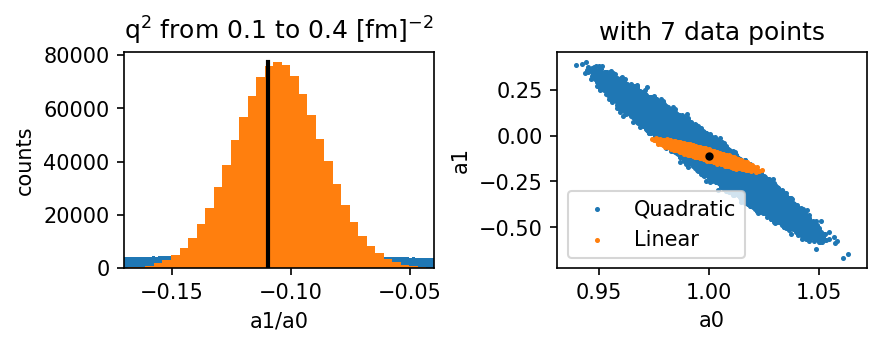

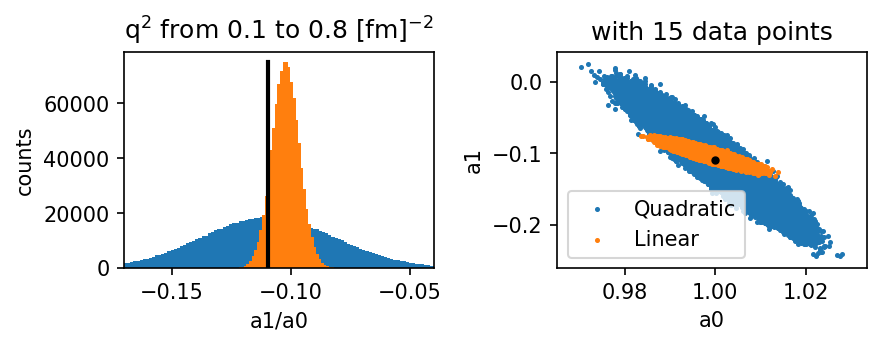

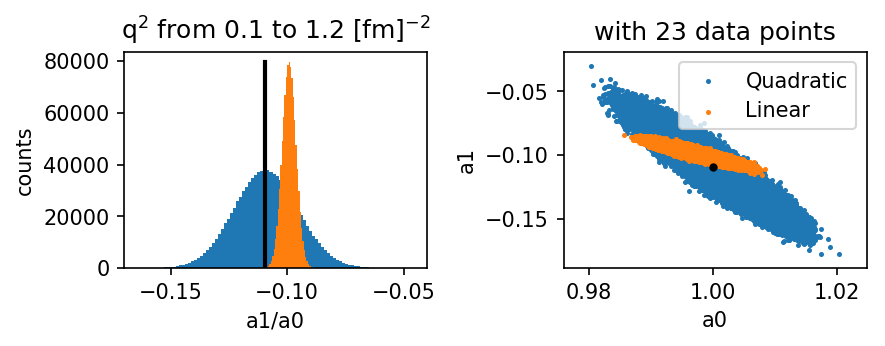

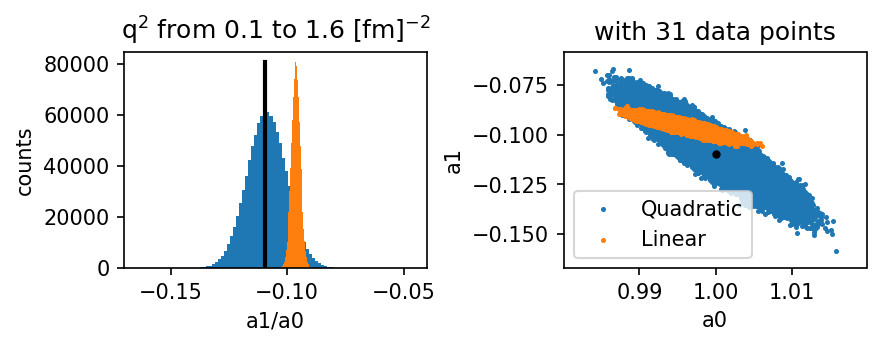

In [6]:
print('\nSimulation result in the format shown in the Z.Phys. table.   Without showing the uncertainties, this \
table makes it look like quadratic fits should always be selected over linear fits \n')
print('| Range     | Linear     |  Quadratic |')
print('| [fm^{-2}] | a0   Radius|  a0  Radius|')

for n in range(len(maxq2)):
    la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
    la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
    la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
    lsum=la1/la0
    qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
    qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
    qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
    qsum=qa1/qa0
    
    print("|",minq2[n],"-",maxq2[n],"| {0:0.3f}| {1:.2f}| {2:0.3f}| {3:0.2f}|"
          .format(np.mean(la0),np.sqrt(-6*np.mean(lsum)),np.mean(qa0),np.sqrt(-6*np.mean(qsum))))

print('\nBut by simply showing the root mean square error (RMSE) it is clear that for low q2 linear fits are better.\
  In fact, this nicely illistrates not only the bias-variance trade-off, but also the fact that the best fit function\n\
is not always the true function [add math paper reference]\n')

print('| Range     | Linear                                           | Quadratic                                        |')
print('| [fm^{-2}] |   a0  | Radius|  a1/a0 |  Bias  | Sigma |  RMSE  |   a0  | Radius| a1/a0  |  Bias  | Sigma |  RMSE  |')


for n in range(len(maxq2)):
    la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
    la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
    la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
    lsum=la1/la0
    qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
    qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
    qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
    qsum=qa1/qa0
    
    print("|",minq2[n],"-",maxq2[n],"| {8:0.4f}| {6:.4f}| {10:0.4f}| {0:0.4f}| {1:0.4f}| {2:0.4f} | {9:0.4f}| {7:0.4f}| {11:0.4f}| {3:+0.4f}| {4:0.4f}| {5:0.4f} |"
          .format(true-np.mean(lsum),np.std(lsum),np.sqrt((true-np.mean(lsum))**2+np.std(lsum)**2),
                  true-np.mean(qsum),np.std(qsum),np.sqrt((true-np.mean(qsum))**2+np.std(qsum)**2),
                  np.sqrt(-6*np.mean(lsum)),np.sqrt(-6*np.mean(qsum)),
                  np.mean(la0),np.mean(qa0),np.mean(lsum),np.mean(qsum)))#,np.mean(1sum),np.mean(qsum)))


for n in range(len(maxq2)):
    la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
    la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
    la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
    lsum=la1/la0
    la=la1
    qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
    qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
    qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
    qsum=qa1/qa0
    lq=qa1
    
    plt.figure(dpi=150)
    # a1/a0 Projection 
    plt.subplot(2, 2, 1) 
    plt.title('q$^2$ from '+str(minq2[n])+' to '+str(maxq2[n])+' [fm]$^{-2}$')
    plt.hist(qsum,bins=100,range=(-0.17,-0.04)) 
    x, y, _ = plt.hist(lsum,bins=50)
    plt.xlabel('a1/a0')
    plt.ylabel('counts')
    plt.plot([true,true], [0, x.max()], 'k-', lw=2)
    plt.xlim(-0.17,-0.04)
    # Scattering Plot 
    plt.subplot(2, 2, 2) 
    plt.title('with '+str(linear_example_result[n].ndata)+' data points')
    plt.scatter(qa0,qa1,s=2,label='Quadratic')
    plt.scatter(la0,la1,s=2,label='Linear',zorder=11)
    plt.plot(1, true, marker='o', markersize=3, color="black",zorder=20)
    plt.xlabel('a0')
    plt.ylabel('a1')
    plt.tight_layout()
    plt.legend()
    plt.savefig("zresult.png")
    plt.show()
    
 

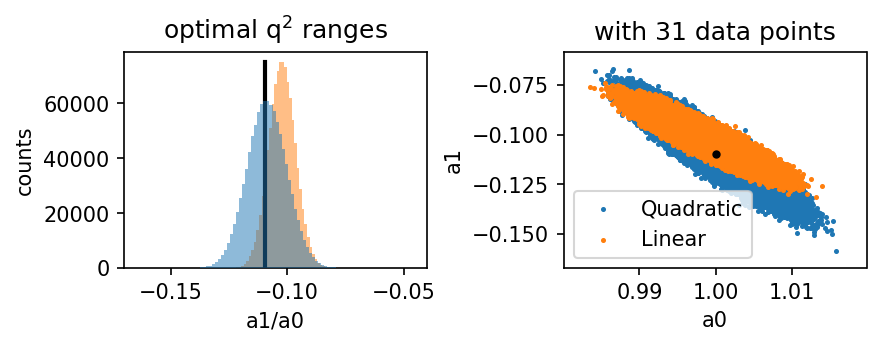

In [10]:
   
la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
la1=(np.ndarray.transpose(np.asarray(rlinear['1']))[1])
la0=(np.ndarray.transpose(np.asarray(rlinear['1']))[0])
lsum=la1/la0
la=la1
qa2=(np.ndarray.transpose(np.asarray(rquad['3']))[2])
qa1=(np.ndarray.transpose(np.asarray(rquad['3']))[1])
qa0=(np.ndarray.transpose(np.asarray(rquad['3']))[0])
qsum=qa1/qa0
lq=qa1

plt.figure(dpi=150)
# a1/a0 Projection 
plt.subplot(2, 2, 1) 
plt.title('optimal q$^2$ ranges')
plt.hist(qsum,bins=100,range=(-0.17,-0.04),zorder=10,alpha=0.5) 
x, y, _ = plt.hist(lsum,bins=50,zorder=1,alpha=0.5)
plt.xlabel('a1/a0')
plt.ylabel('counts')
plt.plot([true,true], [0, x.max()], 'k-', lw=2)
plt.xlim(-0.17,-0.04)
# Scattering Plot 
plt.subplot(2, 2, 2) 
plt.title('with '+str(linear_example_result[n].ndata)+' data points')
plt.scatter(qa0,qa1,s=2,label='Quadratic')
plt.scatter(la0,la1,s=2,label='Linear',zorder=11)
plt.plot(1, true, marker='o', markersize=3, color="black",zorder=20)
plt.xlabel('a0')
plt.ylabel('a1')
plt.tight_layout()
plt.legend()
plt.show()

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 7
    # variables        = 2
    chi-square         = 3.257
    reduced chi-square = 0.651
    Akaike info crit   = -1.357
    Bayesian info crit = -1.465
[[Variables]]
    a0:   0.99506233 +/- 0.004106 (0.41%) (init= 1)
    a1:  -0.10096723 +/- 0.015251 (15.11%) (init=-0.11)
[[Correlations]] (unreported correlations are <  0.100)
    C(a0, a1)                    = -0.928 



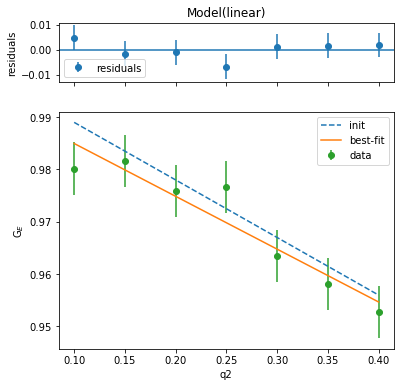

[[Model]]
    Model(quad)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 7
    # variables        = 3
    chi-square         = 1.539
    reduced chi-square = 0.385
    Akaike info crit   = -4.603
    Bayesian info crit = -4.766
[[Variables]]
    a0:   0.98004825 +/- 0.007775 (0.79%) (init= 1)
    a1:   0.04202403 +/- 0.068686 (163.44%) (init=-0.11)
    a2:  -0.28598254 +/- 0.135356 (47.33%) (init= 0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(a1, a2)                    = -0.985 
    C(a0, a1)                    = -0.965 
    C(a0, a2)                    =  0.914 



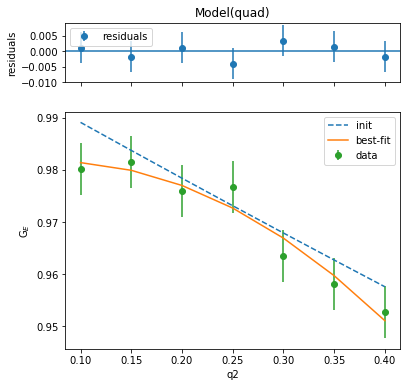

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 15
    # variables        = 2
    chi-square         = 2.196
    reduced chi-square = 0.169
    Akaike info crit   = -24.822
    Bayesian info crit = -23.406
[[Variables]]
    a0:   1.00226202 +/- 0.001226 (0.12%) (init= 1)
    a1:  -0.10777894 +/- 0.002456 (2.28%) (init=-0.11)
[[Correlations]] (unreported correlations are <  0.100)
    C(a0, a1)                    = -0.902 



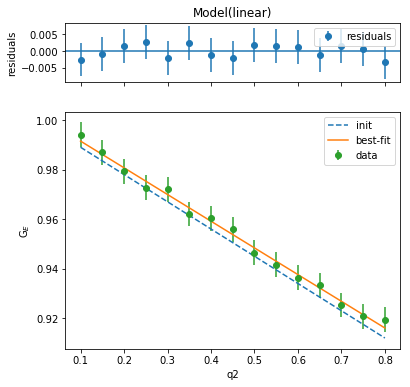

[[Model]]
    Model(quad)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 15
    # variables        = 3
    chi-square         = 1.840
    reduced chi-square = 0.153
    Akaike info crit   = -25.477
    Bayesian info crit = -23.353
[[Variables]]
    a0:   1.00515813 +/- 0.002230 (0.22%) (init= 1)
    a1:  -0.12450514 +/- 0.011219 (9.01%) (init=-0.11)
    a2:   0.01858467 +/- 0.012192 (65.60%) (init= 0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(a1, a2)                    = -0.978 
    C(a0, a1)                    = -0.932 
    C(a0, a2)                    =  0.852 



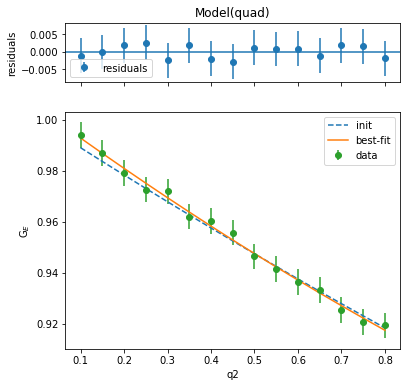

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 23
    # variables        = 2
    chi-square         = 24.869
    reduced chi-square = 1.184
    Akaike info crit   = 5.797
    Bayesian info crit = 8.068
[[Variables]]
    a0:   0.99622378 +/- 0.002496 (0.25%) (init= 1)
    a1:  -0.09414253 +/- 0.003420 (3.63%) (init=-0.11)
[[Correlations]] (unreported correlations are <  0.100)
    C(a0, a1)                    = -0.891 



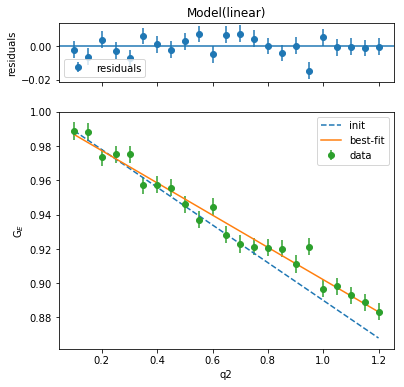

[[Model]]
    Model(quad)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 23
    # variables        = 3
    chi-square         = 22.935
    reduced chi-square = 1.147
    Akaike info crit   = 5.935
    Bayesian info crit = 9.341
[[Variables]]
    a0:   1.00084290 +/- 0.004322 (0.43%) (init= 1)
    a1:  -0.11335806 +/- 0.015171 (13.38%) (init=-0.11)
    a2:   0.01478117 +/- 0.011379 (76.99%) (init= 0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(a1, a2)                    = -0.975 
    C(a0, a1)                    = -0.915 
    C(a0, a2)                    =  0.823 



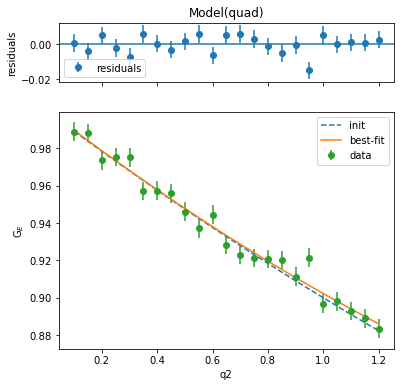

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 31
    # variables        = 2
    chi-square         = 23.097
    reduced chi-square = 0.796
    Akaike info crit   = -5.123
    Bayesian info crit = -2.255
[[Variables]]
    a0:   0.99579288 +/- 0.001721 (0.17%) (init= 1)
    a1:  -0.09610158 +/- 0.001792 (1.86%) (init=-0.11)
[[Correlations]] (unreported correlations are <  0.100)
    C(a0, a1)                    = -0.885 



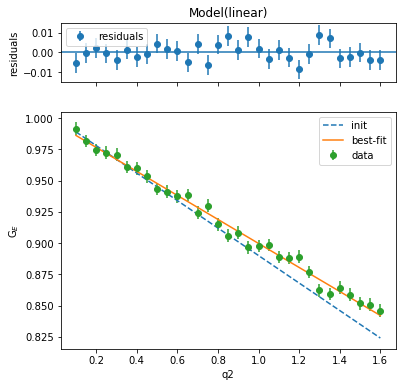

[[Model]]
    Model(quad)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 31
    # variables        = 3
    chi-square         = 20.948
    reduced chi-square = 0.748
    Akaike info crit   = -6.150
    Bayesian info crit = -1.848
[[Variables]]
    a0:   0.99964396 +/- 0.002818 (0.28%) (init= 1)
    a1:  -0.10863141 +/- 0.007594 (6.99%) (init=-0.11)
    a2:   0.00737048 +/- 0.004348 (59.01%) (init= 0.01)
[[Correlations]] (unreported correlations are <  0.100)
    C(a1, a2)                    = -0.973 
    C(a0, a1)                    = -0.905 
    C(a0, a2)                    =  0.806 



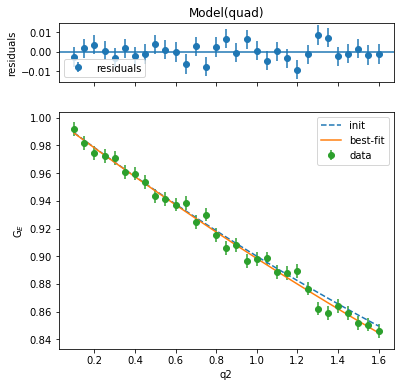

In [9]:
for n in range(len(maxq2)):
    print(linear_example_result[n].fit_report())
    linear_example_result[n].plot()
    plt.ylabel('G$_E$')
    plt.show()
    print(quad_example_result[n].fit_report())
    quad_example_result[n].plot()
    plt.ylabel('G$_E$')
    plt.show()

<b>Input Radius Was 0.81132 fm (an a1 term of 0.10971)</b><br>
By focusing solely on the bias the authors completely missed the fact, the variance of
the low q2 fit had an enormous varaince.  In fact, their next step is to further increase
model complexity by added three more parameters (floating normalization).

## Equal Counts In Each Range 

This is already a bit misleading as I am putting more then twice the events in the higher Q2 cut when we all know the cross section fall rapidly with the Mott cross section; so next we repeat the exercise with equal events spaced between the limits.   In other words, it requires far less beam time to take low Q2 data then to take high Q2 data.

In [10]:

import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters

def dipole(q2):
      return (1+q2/18.23)**(-2)
true=-0.1097 # input radius


def linear(q2,a0,a1):
    return a0+a1*q2

def quad(q2,a0,a1,a2):
    return a0+a1*q2+a2*q2**2


minq2=[0.1,0.1,0.1,0.1]
maxq2=[0.4,0.8,1.2,1.6]

spacing=0.05
error=0.005 
loops=100000
# I should make this dynamic
lone=[]; ltwo=[]; lthree=[]; lfour=[]
qone=[]; qtwo=[]; qthree=[]; qfour=[]

rlinear={'0':lone,
         '1':ltwo,
         '2':lthree,
         '3':lfour}

rquad={'0':qone,
       '1':qtwo,
       '2':qthree,
       '3':qfour}

linear_example_result=[]
quad_example_result=[]

fit_params = Parameters()
fit_params.add('a0',  value= 1.00)
fit_params.add('a1',  value= -0.11)
fit_params.add('a2',  value= 0.0125)

for n in range(len(maxq2)):
    q2list=np.linspace(minq2[n],maxq2[n],int(np.around((maxq2[n]-minq2[n])/spacing)+1))
    print('Generating faux data at q2 points:\n ',q2list)
    #q2list=np.linspace(minq2[n],maxq2[n],len(data))
    #print('Generating faux data at q2 points:\n ',q2list)
    for m in range(loops):
        data=dipole(q2list)*(1+error*np.random.randn(len(q2list)))
        #data=data*(1+0.00*np.random.randn())
        model=Model(quad)
        #result_quad=model.fit(data,q2=q2list,a0=1,a1=-0.11,a2=0.01,weights=1/error)
        result_quad=model.fit(data,q2=q2list,params=fit_params,weights=1/error)
        model=Model(linear)
        result_linear=model.fit(data,q2=q2list,a0=1,a1=-0.11,weights=1/error)
        #results.append([result_linear,result_quad]) 
        #rlinear[str(n)].append(result_linear)
        #rquad[str(n)].append(result_quad)
        rlinear[str(n)].append([result_linear.best_values['a0'],result_linear.best_values['a1']])
        rquad[str(n)].append([result_quad.best_values['a0'],result_quad.best_values['a1'],result_quad.best_values['a2']])
    # saving one full fit object for each range
    linear_example_result.append(result_linear) 
    quad_example_result.append(result_quad)     

Generating faux data at q2 points:
  [ 0.1   0.15  0.2   0.25  0.3   0.35  0.4 ]
Generating faux data at q2 points:
  [ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8 ]
Generating faux data at q2 points:
  [ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2 ]
Generating faux data at q2 points:
  [ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25
  1.3   1.35  1.4   1.45  1.5   1.55  1.6 ]



 Simulation results. 

| Range     | Linear     |  Quadratic |
| [fm^{-2}] | a0   Radius|  a0  Radius|
| 0.1 - 0.4 | 1.000| 0.79| 1.000| 0.81|
| 0.1 - 0.8 | 0.999| 0.78| 1.000| 0.81|
| 0.1 - 1.2 | 0.997| 0.77| 1.000| 0.81|
| 0.1 - 1.6 | 0.996| 0.76| 1.000| 0.81|

 Putting both the bias and variance together shows that the picture is not so clear cut.

| Range     | Linear                                           | Quadratic                                        |
| [fm^{-2}] |   a0  | Radius|  a1/a0 |  Bias  | Sigma |  RMSE  |   a0  | Radius| a1/a0  |  Bias|  Sigma  |  RMSE  |
| 0.1 - 0.4 | 0.9995| 0.7947| -0.1053| -0.0044| 0.0179| 0.0184 | 1.0000| 0.8058| -0.1082| -0.0015| 0.1070| 0.1071 |
| 0.1 - 0.8 | 0.9987| 0.7827| -0.1021| -0.0076| 0.0054| 0.0093 | 1.0000| 0.8093| -0.1092| -0.0005| 0.0270| 0.0270 |
| 0.1 - 1.2 | 0.9975| 0.7712| -0.0991| -0.0106| 0.0028| 0.0109 | 0.9999| 0.8087| -0.1090| -0.0007| 0.0131| 0.0131 |
| 0.1 - 1.6 | 0.9959| 0.7600| -0.0963| -0.0134| 0.0017| 0.0135 | 

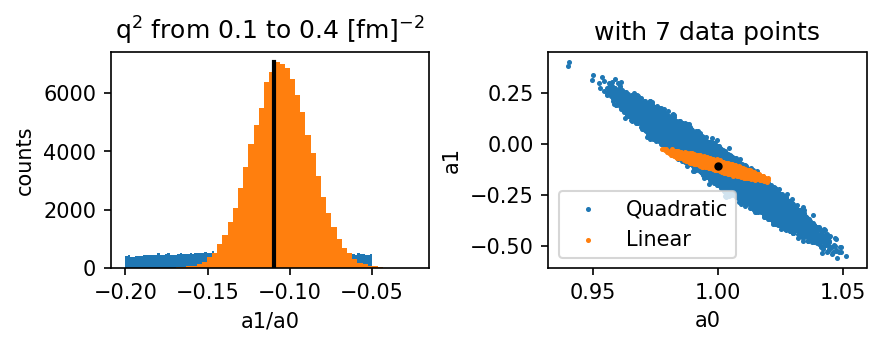

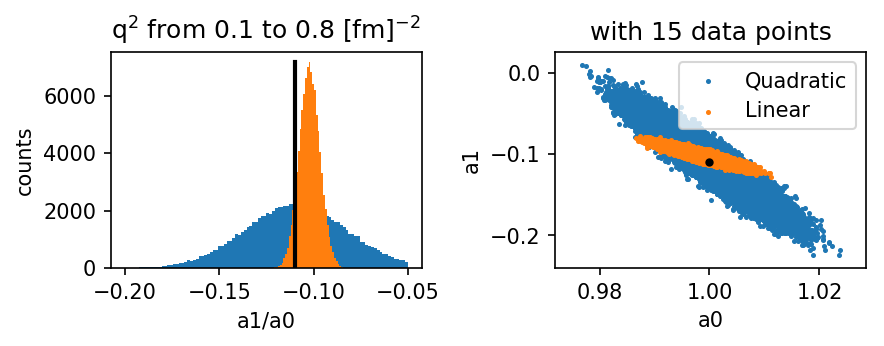

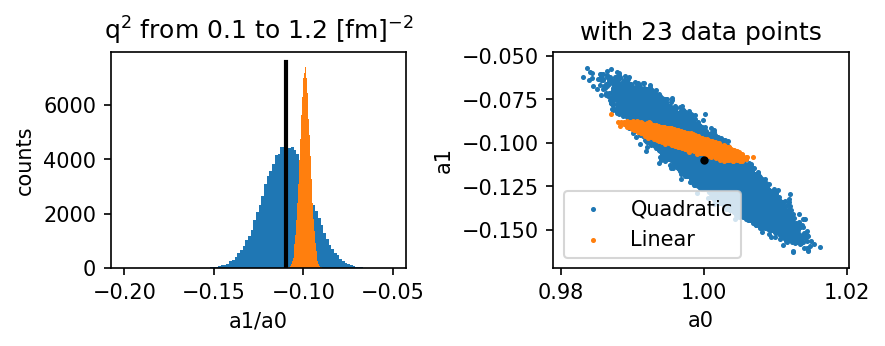

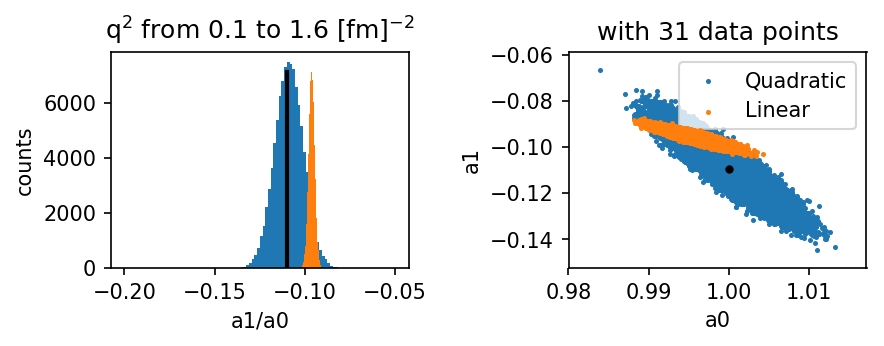

In [11]:
print('\n Simulation results. \n')
print('| Range     | Linear     |  Quadratic |')
print('| [fm^{-2}] | a0   Radius|  a0  Radius|')

for n in range(len(maxq2)):
    la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
    la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
    la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
    lsum=la1/la0
    qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
    qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
    qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
    qsum=qa1/qa0
    
    print("|",minq2[n],"-",maxq2[n],"| {0:0.3f}| {1:.2f}| {2:0.3f}| {3:0.2f}|"
          .format(np.mean(la0),np.sqrt(-6*np.mean(lsum)),np.mean(qa0),np.sqrt(-6*np.mean(qsum))))

print('\n Putting both the bias and variance together shows that the picture is not so clear cut.\n')

print('| Range     | Linear                                           | Quadratic                                        |')
print('| [fm^{-2}] |   a0  | Radius|  a1/a0 |  Bias  | Sigma |  RMSE  |   a0  | Radius| a1/a0  |  Bias|  Sigma  |  RMSE  |')


for n in range(len(maxq2)):
    la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
    la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
    la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
    lsum=la1/la0
    qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
    qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
    qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
    qsum=qa1/qa0
    
    print("|",minq2[n],"-",maxq2[n],"| {8:0.4f}| {6:.4f}| {10:0.4f}| {0:0.4f}| {1:0.4f}| {2:0.4f} | {9:0.4f}| {7:0.4f}| {11:0.4f}| {3:0.4f}| {4:0.4f}| {5:0.4f} |"
          .format(true-np.mean(lsum),np.std(lsum),np.sqrt((true-np.mean(lsum))**2+np.std(lsum)**2),
                  true-np.mean(qsum),np.std(qsum),np.sqrt((true-np.mean(qsum))**2+np.std(qsum)**2),
                  np.sqrt(-6*np.mean(lsum)),np.sqrt(-6*np.mean(qsum)),
                  np.mean(la0),np.mean(qa0),np.mean(lsum),np.mean(qsum)))#,np.mean(1sum),np.mean(qsum)))


for n in range(len(maxq2)):
    la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
    la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
    la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
    lsum=la1/la0
    la=la1
    qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
    qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
    qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
    qsum=qa1/qa0
    lq=qa1
    
    plt.figure(dpi=150)
    plt.subplot(2, 2, 1) 
    plt.title('q$^2$ from '+str(minq2[n])+' to '+str(maxq2[n])+' [fm]$^{-2}$')
    plt.hist(qsum,bins=100,range=(-0.2,-0.05)) 
    x, y, _ = plt.hist(lsum,bins=50)
    #plt.yscale('log')
    plt.xlabel('a1/a0')
    plt.ylabel('counts')
    plt.plot([true,true], [0, x.max()], 'k-', lw=2)
    plt.subplot(2, 2, 2) 
    plt.title('with '+str(linear_example_result[n].ndata)+' data points')
    plt.scatter(qa0,qa1,s=2,label='Quadratic')
    plt.scatter(la0,la1,s=2,label='Linear',zorder=11)
    plt.plot(1, true, marker='o', markersize=3, color="black",zorder=20)
    plt.xlabel('a0')
    plt.ylabel('a1')
    plt.tight_layout()
    plt.legend()
    plt.show()

# Finally We Compare Linear With The Generating Function

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters

def dipole(q2):
      return (1+q2/18.23)**(-2)
true=-0.1097 # input radius


def linear(q2,a0,a1):
    return a0*(1+a1*q2)

def quad(q2,a0,a1,a2):
    return a0*(1+a1*q2+a2*q2**2)

def fixedquad(q2,a0,a1,a2):
    return (1+a1*q2+a2*q2**2)

def fixedlinear(q2,a0,a1):
    return (1+a1*q2)

def fitdipole(q2,a0,a1):
    return a0*(1-a1*q2/2)**(-2) 

minq2=0.1
maxq2=0.4

#spacing=0.01
#error=0.01
#loops=100000

spacing=0.05
error=0.01
loops=1000000

# I should make this dynamic
lone=[]; ltwo=[]; lthree=[]; lfour=[]
qone=[]; qtwo=[]; qthree=[]; qfour=[]

rlinear={'0':lone,
         '1':ltwo,
         '2':lthree,
         '3':lfour}

rquad={'0':qone,
       '1':qtwo,
       '2':qthree,
       '3':qfour}

linear_example_result=[]
quad_example_result=[]

fit_params = Parameters()
fit_params.add('a0',  value= 1.00)
fit_params.add('a1',  value= -0.11)
#fit_params.add('a2',  value= 0.0125)

n=0
q2list=np.linspace(minq2,maxq2,int(np.around((maxq2-minq2)/spacing)+1))
print('Generating faux data at q2 points:\n ',q2list)
for m in range(loops):
        data=dipole(q2list)*(1+error*np.random.randn(len(q2list)))
        #data=data*(1+0.00*np.random.randn())
        model=Model(fitdipole)
        result_quad=model.fit(data,q2=q2list,a0=1,a1=-0.11,weights=1/error)
        model=Model(linear)
        result_linear=model.fit(data,q2=q2list,a0=1,a1=-0.11,weights=1/error)
        model=Model(quad)
        result_tquad=model.fit(data,q2=q2list,a0=1,a1=-0.11,a2=0,weights=1/error)
        #results.append([result_linear,result_quad]) 
        #rlinear[str(n)].append(result_linear)
        #rquad[str(n)].append(result_quad)
        rlinear[str(n)].append([result_linear.best_values['a0'],result_linear.best_values['a1']])
        rquad[str(n)].append([result_quad.best_values['a0'],result_quad.best_values['a1'],0])
        if m%100 == 0:
            print('.',end='')
        if m%10000 == 0:
            print(m,end='')
linear_example_result.append(result_linear) 
quad_example_result.append(result_quad)     

Generating faux data at q2 points:
  [0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]


.0....................................................................................................10000....................................................................................................20000....................................................................................................30000....................................................................................................40000....................................................................................................50000....................................................................................................60000....................................................................................................70000....................................................................................................80000....................................................................................................90000.....................................................

..............................................................780000....................................................................................................790000....................................................................................................800000....................................................................................................810000....................................................................................................820000....................................................................................................830000....................................................................................................840000....................................................................................................850000....................................................................................................860000....................................................................................

In [14]:
print('\n Simulation results for ',len(q2list),' points. \n')
print('| Range     | Linear     |  Dipole    |')
print('| [fm^{-2}] | a0   Radius|  n0  Radius|')

la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
lsum=la1/la0
qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
#qsum=qa1/qa0
qsum=qa1
    
print("|",minq2,"-",maxq2,"| {0:0.3f}| {1:.2f}| {2:0.3f}| {3:0.2f}|"
          .format(np.mean(la0),np.sqrt(-6*np.mean(lsum)),np.mean(qa0),np.sqrt(-6*np.mean(qa1))))

print('\n Putting both the bias and variance together shows that the picture is not so clear cut.\n')

print('| Range     | Linear                                           | Dipole                                          |')
print('| [fm^{-2}] |   a0  | Radius|  a1/a0 |  Bias  | Sigma |  RMSE  |   n0  | Radius|   b1   |  Bias | Sigma |  RMSE  |')


la1=[];la0=[];lsum=[];qa2=[];qa1=[];aq0=[];qsum=[]
la1=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[1])
la0=(np.ndarray.transpose(np.asarray(rlinear[str(n)]))[0])
lsum=la1/la0
qa2=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[2])
qa1=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[1])
qa0=(np.ndarray.transpose(np.asarray(rquad[str(n)]))[0])
#qsum=qa1/qa0
qsum=qa1
    
print("|",minq2,"-",maxq2,"| {8:0.4f}| {6:.4f}| {10:0.4f}| {0:0.4f}| {1:0.4f}| {2:0.4f} | {9:0.4f}| {7:0.4f}| {11:0.4f}| {3:0.4f}| {4:0.4f}| {5:0.4f} |"
          .format(true-np.mean(lsum),np.std(lsum),np.sqrt((true-np.mean(lsum))**2+np.std(lsum)**2),
                  true-np.mean(qsum),np.std(qsum),np.sqrt((true-np.mean(qsum))**2+np.std(qsum)**2),
                  np.sqrt(-6*np.mean(lsum)),np.sqrt(-6*np.mean(qa1)),
                  np.mean(la0),np.mean(qa0),np.mean(lsum),np.mean(qa1)))#,np.mean(1sum),np.mean(qsum)))




 Simulation results for  7  points. 

| Range     | Linear     |  Dipole    |
| [fm^{-2}] | a0   Radius|  n0  Radius|
| 0.1 - 0.4 | 1.000| 0.79| 1.000| 0.81|

 Putting both the bias and variance together shows that the picture is not so clear cut.

| Range     | Linear                                           | Dipole                                          |
| [fm^{-2}] |   a0  | Radius|  a1/a0 |  Bias  | Sigma |  RMSE  |   n0  | Radius|   b1   |  Bias | Sigma |  RMSE  |
| 0.1 - 0.4 | 0.9995| 0.7927| -0.1047| -0.0050| 0.0349| 0.0353 | 1.0000| 0.8118| -0.1098| 0.0001| 0.0389| 0.0389 |


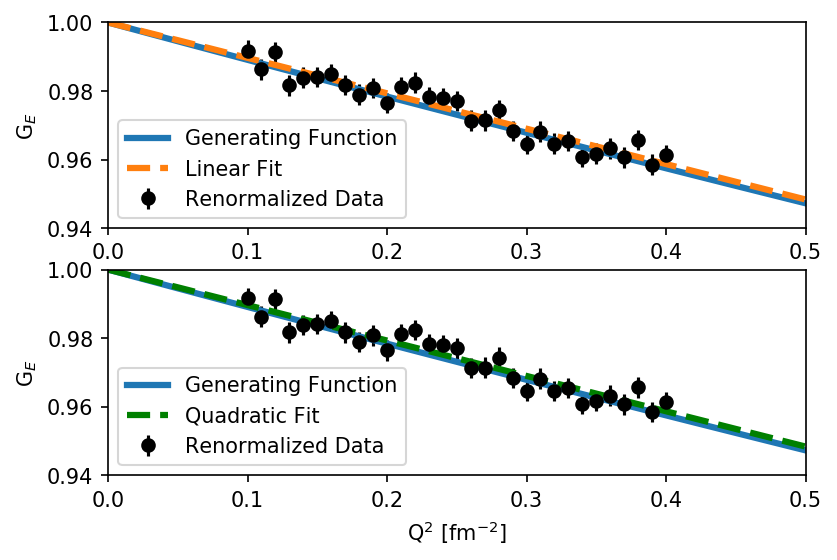

In [10]:
#result_quad.plot()
#result_linear.plot()
#plt.show()

q2list2=np.linspace(0.,0.5,100)

plt.figure(dpi=150)

plt.subplot(2,1,1)
plt.plot(q2list2,dipole(q2list2),'-',lw=3,label='Generating Function')
plt.plot(q2list2,fixedlinear(q2list2,**result_linear.best_values),'--',lw=3,label='Linear Fit')
plt.errorbar(q2list,data/result_linear.best_values['a0'],yerr=error,fmt='o',color='black',label='Renormalized Data')
plt.legend()
plt.xlabel('Q$^2$ [fm$^{-2}$]')
plt.ylabel('G$_E$')
plt.ylim(0.94,1)
plt.xlim(0,0.5)

plt.subplot(2,1,2)
#plt.plot(q2list2,dipole(q2list2,**result_quad.best_values),'-',lw=3,label='Generating Function')
plt.plot(q2list2,dipole(q2list2),'-',lw=3,label='Generating Function')
#plt.plot(q2list2,linear(q2list2,**result_linear.best_values),'--',lw=3,label='Linear Fit')
plt.plot(q2list2,fixedquad(q2list2,**result_tquad.best_values),'--',lw=3,label='Quadratic Fit',color='green')
#plt.errorbar(q2list,data,yerr=error,fmt='o',color='black')
plt.errorbar(q2list,data/result_tquad.best_values['a0'],yerr=error,fmt='o',color='black',label='Renormalized Data')
plt.legend()
plt.xlabel('Q$^2$ [fm$^{-2}$]')
plt.ylabel('G$_E$')
plt.xlim(0,0.5)
plt.ylim(0.94,1)
plt.savefig('linearVSquadratic.pdf')
plt.show()


In [173]:
print(result_linear.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 31
    # variables        = 2
    chi-square         = 40.655
    reduced chi-square = 1.402
    Akaike info crit   = 12.405
    Bayesian info crit = 15.273
[[Variables]]
    a0:   0.99825132 +/- 0.001893 (0.19%) (init= 1)
    a1:  -0.09829580 +/- 0.006969 (7.09%) (init=-0.11)
[[Correlations]] (unreported correlations are <  0.100)
    C(a0, a1)                    = -0.938 

